**INTEGRANTES:**
1. José Ignacio Rengifo Villegas
2. Sergio David Bravo Talero

# Laboratorio 1: Desarrollo de una herramienta analítica

En este documento se da a conocer la implementación realizada por los estudiantes: 
- José Rengifo: 2021
- Sergio Bravo: 200714733

## Fase 1: OBTENER E INSPECCIONAR ARCHIVOS
### Misión 1: Parsear la data

In [56]:
def loadDataFromFilteAt(path):
    return open(path, 'r', newline = '\r\n').read().splitlines()

def loadData():
    edades = loadDataFromFilteAt("Archivos/edad.txt")
    edades = [int(i) for i in edades]

    estadosCiviles = loadDataFromFilteAt("Archivos/estado_civil.txt") 
    escolaridades = loadDataFromFilteAt("Archivos/escolaridad.txt")
    
    estratos = loadDataFromFilteAt("Archivos/estrato.txt")
    estratos = [int(i) for i in estratos]

    generos = loadDataFromFilteAt("Archivos/genero.txt")
    
    promedios = loadDataFromFilteAt("Archivos/promedio.txt")
    promedios = [float(i) for i in promedios]

    regiones = loadDataFromFilteAt("Archivos/region.txt")
    data = [edades, estadosCiviles, escolaridades, estratos, generos, promedios, regiones]
    return data
 
(edades, estadosCiviles, escolaridades, estratos, generos, promedios, regiones) = loadData()

### Misión 2: Calcular estadísticas

A continuación los calculos realizados para obtener las medias y las desviaciones estándar para los parámetros: edades, estratos y promedio.

In [57]:
import functools
import math

dataSize = min(len(edades), len(estadosCiviles), len(escolaridades), len(estratos), len(generos), len(promedios), len(regiones))
def getMeans():
    suma_edades = functools.reduce(lambda a, b: a + b, edades, 0)
    suma_estrato = functools.reduce(lambda a, b: a + b, estratos, 0)
    suma_promedio = functools.reduce(lambda a, b: a + b, promedios, 0)
    return (suma_edades / dataSize,
            suma_estrato / dataSize,
            suma_promedio / dataSize)

def getDeviation():
    medias = getMeans()
    desviacion_edades = math.sqrt(functools.reduce(lambda a, b: a + math.pow(b - medias[0], 2), edades, 0) / (dataSize - 1))
    desviacion_estrato = math.sqrt(functools.reduce(lambda a, b: a + math.pow(b - medias[1], 2), estratos, 0) / (dataSize - 1))
    desviacion_promedio = math.sqrt(functools.reduce(lambda a, b: a + math.pow(b - medias[2], 2), promedios, 0) / (dataSize - 1))
    return(desviacion_edades, desviacion_estrato, desviacion_promedio)

desviaciones = getDeviation()
medias = getMeans()
print(medias, desviaciones)

(48.748, 2.308, 2.6212000000000004) (18.613474120584673, 0.9772645968131471, 1.1170345080544164)


Acá las gráficas para representar el problema:

Text(0, 0.5, 'Estratos')

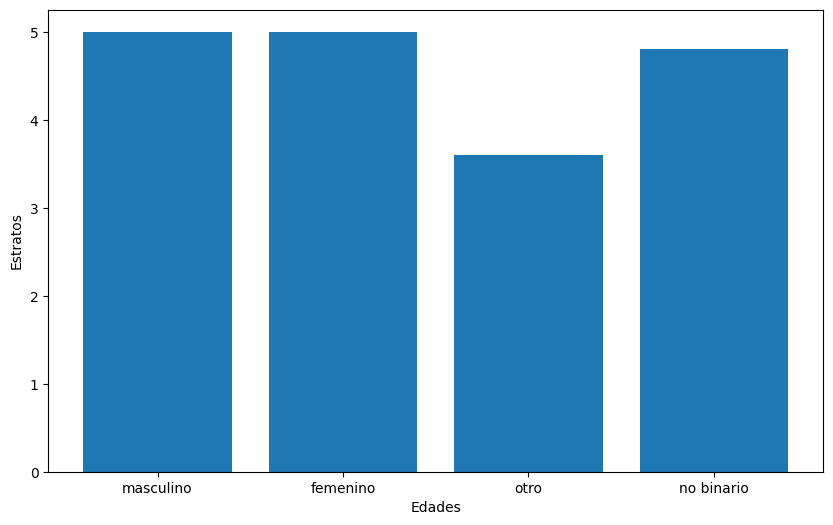

In [58]:
import matplotlib.pyplot as plt

xPositions = list(range(0, 500))
fig, ax = plt.subplots(figsize=(10, 6))
# ax.scatter(x = estratos, y = promedios)
ax.bar(generos, promedios)
plt.xlabel("Edades")
plt.ylabel("Estratos")

# plt.show()